In [1]:
import pandas as pd
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt

pizza_dataset= pd.read_csv('pizza_customers.csv')

## Exercise 1:

## Data Preprocessing

In [2]:
pizza_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
pizza_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
#Checking the unique records in the dataset
print(pizza_dataset.nunique())

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [5]:
#Checking for Null values in the dataset
pizza_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No null values present in the dataset

In [6]:
pizza_dataset[['Gender']]

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [7]:
#Replacing Male and Female values to 0 and 1
pizza_dataset['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [8]:
pizza_dataset['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

## Data Visualization

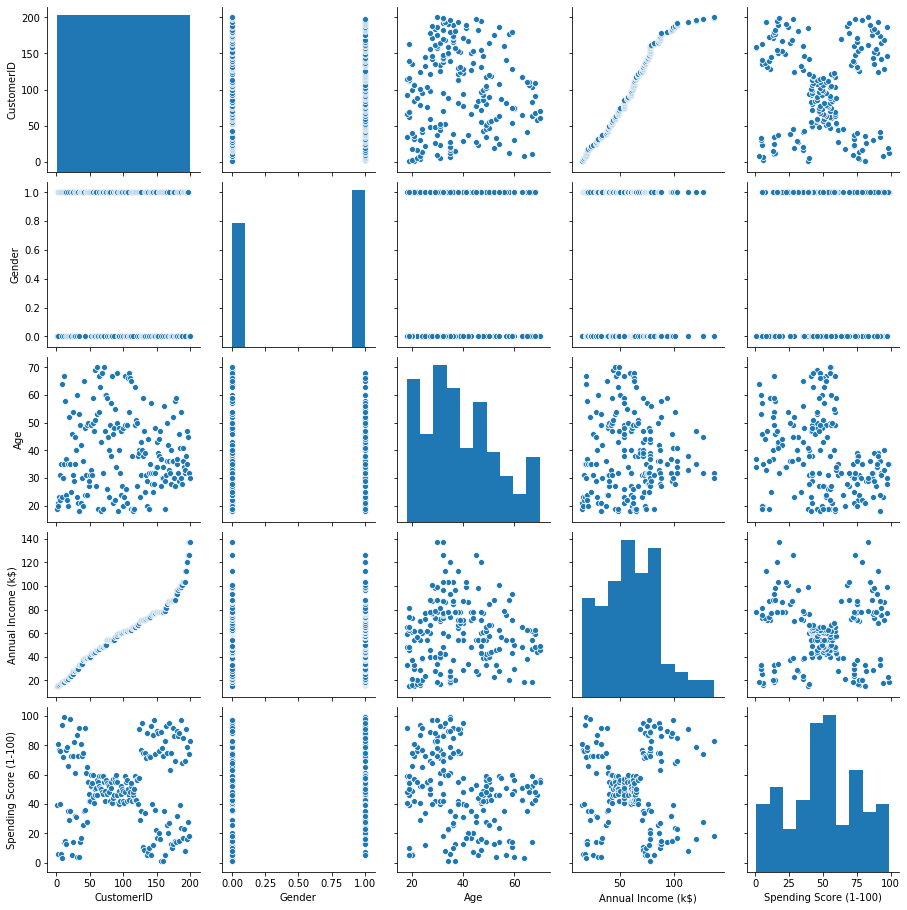

In [9]:
sns.pairplot(pizza_dataset)

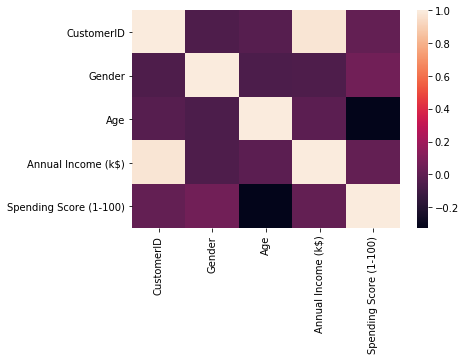

In [10]:
sns.heatmap(pizza_dataset.corr())

From the above visualization, it ooks like Annual_Income and Spending_Score features are highly correlated hence find the clusters based on these two features. 

In [11]:
#Assigning Annual_Income and Spending_Score features to the variable X for model fitting
X=pizza_dataset.iloc[:,[3,4]].values

## KMeans Clustering Algorithm model code

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class kmeans:
    """Apply kmeans algorithm"""
    def __init__(self, num_clusters, max_iter=1000):
        """Initialize number of clusters"""
        
        self.num_clusters = num_clusters
        self.max_iter = max_iter
    
    def initalize_centroids(self, X):
        """Choosing k centroids randomly from data X"""
        
        idx = np.random.permutation(X.shape[0])
        centroids = X[idx[:self.num_clusters]]
        return centroids
        
    def compute_centroid(self, X, labels):
        """Modify centroids by finding mean of all k partitions"""
        
        centroids = np.zeros((self.num_clusters, X.shape[1]))
        for k in range(self.num_clusters):
            centroids[k] = np.mean(X[labels == k], axis=0)
            
        return centroids
    
    def compute_distance(self, X, centroids):
        """Computing L2 norm between datapoints and centroids"""

        distances = np.zeros((X.shape[0], self.num_clusters))
        
        for k in range(self.num_clusters):
            dist = np.linalg.norm(X - centroids[k], axis=1)
            distances[:,k] = np.square(dist)
            
        return distances
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def fit(self, X):
        self.centroids = self.initalize_centroids(X)
        
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroid(X, self.labels)
            
            if np.all(old_centroids == self.centroids):
                break
        
    def compute_sumstar(self, distances):
        """Computing sum total of all distances"""
        pass

## Model Evaluation

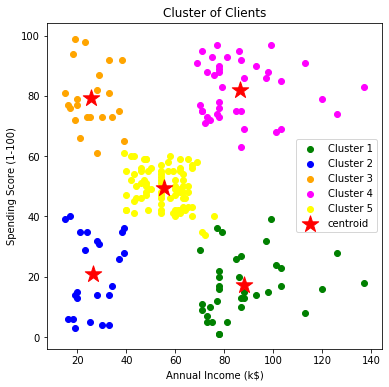

In [13]:
# Applying k-means on the data

kmeansmodel = kmeans(num_clusters=5, max_iter=100)
kmeansmodel.fit(X)
centroids = kmeansmodel.centroids

centroids[0]


# plotting the clustered data with the centoids

plt.figure(figsize=(6,6))
plt.scatter(X[kmeansmodel.labels == 0, 0], X[kmeansmodel.labels == 0, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[kmeansmodel.labels == 1, 0], X[kmeansmodel.labels == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[kmeansmodel.labels == 2, 0], X[kmeansmodel.labels == 2, 1], c = 'orange', label = 'Cluster 3')
plt.scatter(X[kmeansmodel.labels == 3, 0], X[kmeansmodel.labels == 3, 1], c = 'magenta', label = 'Cluster 4')
plt.scatter(X[kmeansmodel.labels == 4, 0], X[kmeansmodel.labels == 4, 1], c = 'yellow', label = 'Cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c = 'red', s = 300, label = 'centroid')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## Exercise 2:
### Cluster 1 (Green Cluster): (Annual Income > 70, Spending Score <= 40)
Customers with High income and a low number of transactions (These are the target customers. Company should provide initial discounts and more offers to do more transactions)

Offer Example: Buy One Get Two pizza and get 2 free coupons worth of Rs.199 each (Conditions Apply)

### Cluster 2 (Blue Cluster): (Annual Income <= 40, Spending Score <= 60)
Customers with low income and a low number of transactions (Customers are not often showing interest to do transactions. To encourage their trasactions, company can provide one or two free limited services every month)

Offer Example: Buy a Pizza today and get 2 free coupons worth of Rs.99 each

### Cluster 3 (Orange Cluster): (Annual Income <=40, Spending Score > 60)
Customers with low income but a High number of transactions (Company can provide offers/discount to these customers to continue their transactions in future)

Offer Example: Get 20% off on buying pizzas upto Rs.100

### Cluster 4 (Magenta Cluster): (Annual Income > 70, Spending Score > 60)
Customers with High income and a High number of transactions (Profitable customers hence provide the existing discounts/offers to the customers)

Offer Example: Get 10% off on buying pizzas upto Rs.50

### Cluster 5 (Yellow Cluster): (Annual Income > 40 and Annual Income <= 70, Spending Score > 40 and Spending Score <= 60)
Customers with medium income and a medium number of transactions (Customers always doing transactions whenever needed hence no additional offers/discounts needed for them)

Offer Example: Visit our store today for our new exciting menus and get compliment drink

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


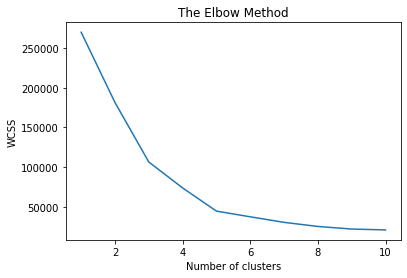

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()